In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import numpy.linalg as nla
import pandas as pnd

import sys
sys.path.append("C:/Users/pierr/OneDrive/Bureau/Dossier en haut à droite/Stage MIA 2023/Codes/Libraries")
import Fonctions as fc

### 0 - Paramètres

In [2]:
#Paramètres connus

N1 = 20
D1 = 10
L1 = 2

### $I$ - PPCA - Données simulées

In [6]:
#Simulation des données

W_1, mu_1, sigma_2 = fc.sim_param(0,0,0,1,1,0.5,D1,L1)
Z_1, Y_1 = fc.sim_data(W_1,mu_1,sigma_2,N1)

In [7]:
#Estimations
W_hat,Z_hat,sigma2_hat = fc.PPCA(Y_1, L1)

In [8]:
#Optimisation de la rotation

alist = np.linspace(0,2*np.pi,101)
distlist_1 = [fc.erreur_Z(Z_1,Z_hat,a,False) for a in alist]
distlist_2 = [fc.erreur_Z(Z_1,Z_hat,a,True) for a in alist]
a1_opt = alist[distlist_1.index(min(np.array(distlist_1)))]
a2_opt = alist[distlist_2.index(min(np.array(distlist_2)))]

if fc.erreur_Z(Z_1,Z_hat,a1_opt,False) <= fc.erreur_Z(Z_1,Z_hat,a2_opt,sym=True) :
    R_opt = fc.rotation(a1_opt)
else :
    R_opt = fc.rotation(a2_opt)@np.array([[1,0],[0,-1]])

Z_opt = Z_hat @ np.transpose(R_opt)
W_opt = W_hat @ np.transpose(R_opt)
Y_opt = Z_opt @ np.transpose(W_opt) + np.mean(Y_1,axis=0)

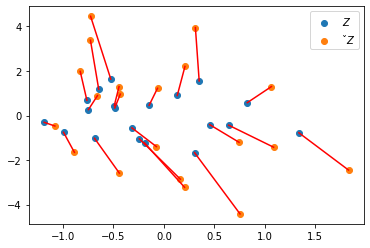

In [9]:
#Représentation graphique

plt.figure()
plt.scatter(Z_1[:,0],Z_1[:,1],label='$Z$')
plt.scatter(Z_opt[:,0],Z_opt[:,1],label='$\check{Z}$')

for i in range(N1):
    plt.plot([Z_1[i][0],Z_opt[i][0]],[Z_1[i][1],Z_opt[i][1]],color='red')
plt.legend()
plt.show()

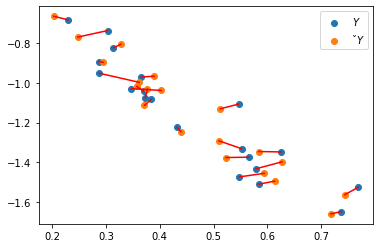

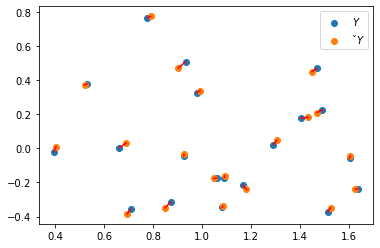

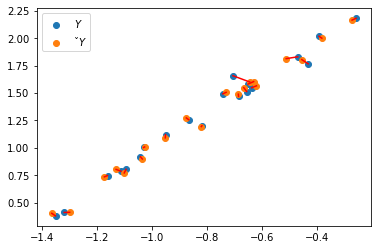

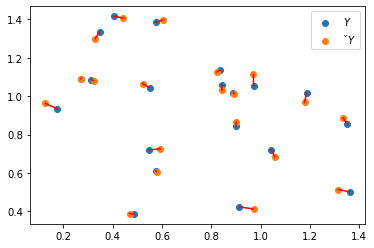

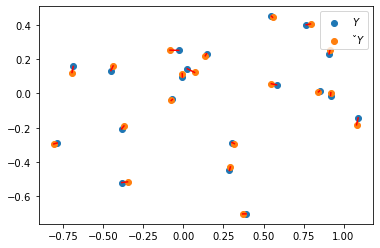

In [10]:
#Représentation graphique

for j in range(int(D1/2)):
    plt.figure()
    plt.scatter(Y_1[:,2*j],Y_1[:,2*j+1],label='$Y$')
    plt.scatter(Y_opt[:,2*j],Y_opt[:,2*j+1],label='$\check{Y}$')

    for i in range(N1):
        plt.plot([Y_1[i][2*j],Y_opt[i][2*j]],[Y_1[i][2*j+1],Y_opt[i][2*j+1]],color='red')

    plt.legend()
    plt.show()